# Covid-19 Dashboard

This is a template for your DIY Covid Dashboard, to which you can add the code you developed in the previous notebooks. The dashboard will be displayed using [voila](https://voila.readthedocs.io/en/stable/index.html), a Python dashboarding tool that converts notebooks to standalone dashboards. Contrary to the other libraries we have seen, the ```voila``` package must be installed using *pip* or *conda* but it does not need to be imported - it rather acts at the level of the notebook server. Package ```voila``` is already installed on the EECS JupyterHub as well as in the binder - to install it locally, follow the [instructions](https://voila.readthedocs.io/en/stable/install.html) online.

Broadly speaking, Voila acts by **running all the cells in your notebook** when the dashboard is first loaded; it then hides all code cells and displays all markdown cells and any outputs, including widgets. However, the code is still there in the background and handles any interaction with the widgets. To view this dashboard template rendered in Voila click [here](https://mybinder.org/v2/gh/fsmeraldi/diy-covid19dash/main?urlpath=%2Fvoila%2Frender%2FDashboard.ipynb).

In [5]:
from uk_covid19 import Cov19API
import json

#print (json)

filters = [
    'areaType=nation',
    'areaName=England']

structure = {
    "date": "date",
    "cases": "newCasesByPublishDate",
    "hospital": "newAdmissions",
    "deaths": "newDeathsByDeathDate"}

api = Cov19API(filters=filters, structure=structure)

timeseries=api.get_json()
agedistribution=api.get_json()
print (agedistribution)

import json
with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF)

print(type(agedistribution))




{'data': [{'date': '2020-11-24', 'cases': 9854, 'hospital': None, 'deaths': None}, {'date': '2020-11-23', 'cases': 13329, 'hospital': None, 'deaths': 120}, {'date': '2020-11-22', 'cases': 16668, 'hospital': None, 'deaths': 274}, {'date': '2020-11-21', 'cases': 17615, 'hospital': 1255, 'deaths': 248}, {'date': '2020-11-20', 'cases': 17845, 'hospital': 1316, 'deaths': 339}, {'date': '2020-11-19', 'cases': 20291, 'hospital': 1484, 'deaths': 371}, {'date': '2020-11-18', 'cases': 17189, 'hospital': 1571, 'deaths': 422}, {'date': '2020-11-17', 'cases': 17549, 'hospital': 1491, 'deaths': 396}, {'date': '2020-11-16', 'cases': 19423, 'hospital': 1560, 'deaths': 371}, {'date': '2020-11-15', 'cases': 21998, 'hospital': 1467, 'deaths': 389}, {'date': '2020-11-14', 'cases': 24298, 'hospital': 1388, 'deaths': 387}, {'date': '2020-11-13', 'cases': 24540, 'hospital': 1433, 'deaths': 380}, {'date': '2020-11-12', 'cases': 30843, 'hospital': 1666, 'deaths': 398}, {'date': '2020-11-11', 'cases': 19970, 'h

## Wrangle the data

The dashboard should contain the logic to wrangle the raw data into a ```DataFrame``` (or more than one, as required) that will be used for plotting. The wrangling code should be put into a function and called on the data from the JSON file (we'll need to call it again on any data downloaded from the API).  In this template, we just pretend we are wrangling ```rawdata``` and generate a dataframe with some random data

2020-01-03 00:00:00  to  2020-11-24 00:00:00
['25_to_29', '30_to_34', '60_to_64', '50_to_54', '40_to_44', '55_to_59', '65_to_69', '5_to_9', '80_to_84', '20_to_24', '35_to_39', '85_to_89', '10_to_14', '90+', '15_to_19', '75_to_79', '0_to_4', '45_to_49', '70_to_74']
85
90
['0_to_4', '5_to_9', '10_to_14', '15_to_19', '20_to_24', '25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49', '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74', '75_to_79', '80_to_84', '85_to_89', '90+']


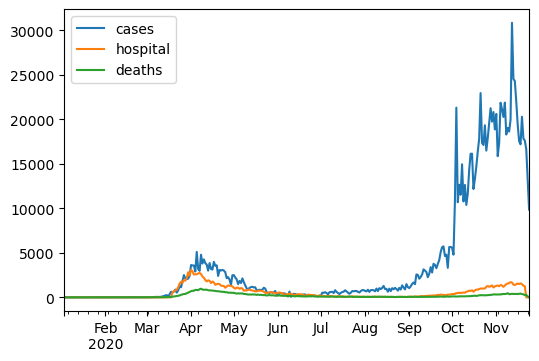

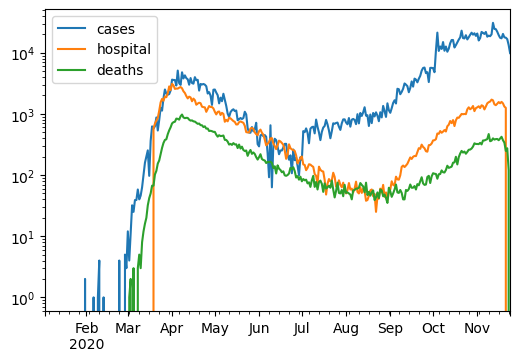

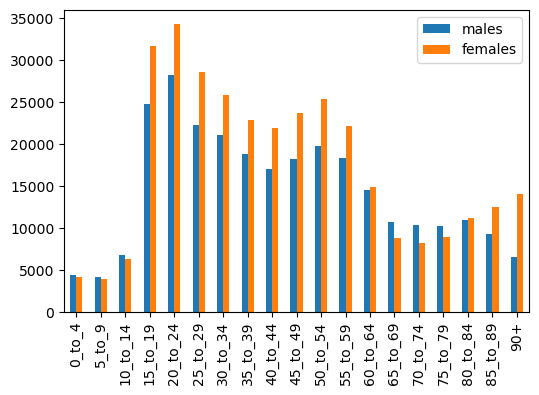

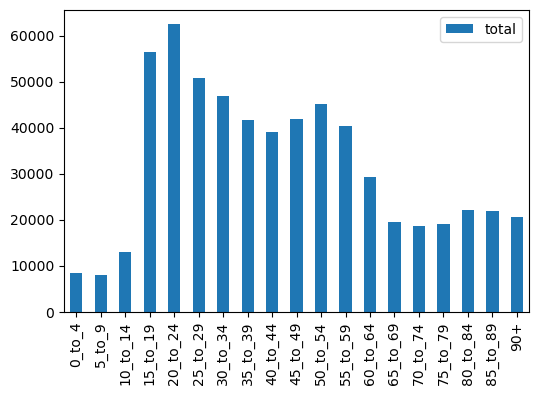

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)
    
#data is a dict, which has a key called "data" that stores all the data
datalist=data['data']
datalist

dates=[caseitem['date'] for caseitem in datalist]
dates.sort()
dates

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['cases', 'hospital', 'deaths'])
timeseriesdf

for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['cases', 'hospital', 'deaths']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf

timeseriesdf.plot()
timeseriesdf.plot(logy=True)

with open("agedistribution.json", "rt") as INFILE:
    data=json.load(INFILE)
data

datadic=data['data'][0] # data['data'] is a list
datadic

males=datadic['males']
females=datadic['females']
males # females is similar 

ageranges=[x['age'] for x in males] # each entry of males is a dictionary
print(ageranges)

def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

print(min_age('85_to_89'))
print(min_age('90+')) # looking good...

ageranges.sort(key=min_age)
print (ageranges)

age_df=pd.DataFrame(index=ageranges, columns=['males','females', 'total'])
for entry in males: # each entry is a dictionary
    ageband=entry['age'] # our index position
    age_df.loc[ageband, 'males']=entry['value']
    
for entry in females:
    ageband=entry['age']
    age_df.loc[ageband, 'females']=entry['value']
    
# this is straightforward
age_df['total']=age_df['males']+age_df['females']

age_df.plot(kind='bar', y=['males','females'])
age_df.plot(kind='bar', y='total')

timeseriesdf.to_pickle("timeseriesdf.pkl")
age_df.to_pickle("agedf.pkl")

## Graphs and Analysis

Include at least one graph with interactive controls, as well as some instructions for the user and/or comments on what the graph represents and how it should be explored (this example shows two random walks)

In [3]:
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

def access_api(button):
    print("I'm downloading data from the API...")
    print("...all done.")
      
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', 
    tooltip='Click to download current Public Health England data',
    icon='download')

apibutton.on_click(access_api)

display(apibutton)

timeseriesdf=pd.read_pickle("timeseriesdf.pkl")

series=wdg.SelectMultiple(
    options=['cases', 'hospital', 'deaths'],
    value=['cases', 'hospital', 'deaths'],
    rows=3,
    description='Stats:',
    disabled=False)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False)

controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
 
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

ctrls=wdg.VBox([series, scale])
form=wdg.HBox([graph, ctrls])

display(form)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

Output()

## Deploying the dashboard

Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

**Author and Copyright Notice** Remember if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*